In [1]:
# Game.py
import pygame 

import copy, random

# Game mechanics engine. Can be used by the UI or a simulator.
class Game:
    def __init__(self, init_tile_matrix = None, init_score = 0):
        self.board_size = 4
        self.reset(init_tile_matrix, init_score)

    # resets the game using the given initialization state and total points
    def reset(self, init_tile_matrix = None, init_score = 0):
        self.undoMat = []
        self.score = init_score
        self.heur_score = init_score
        if init_tile_matrix == None:
            self.tile_matrix = self.new_tile_matrix()

            self.place_random_tile()
            self.place_random_tile()
        else:
            self.tile_matrix = copy.deepcopy(init_tile_matrix)
        self.board_size = len(self.tile_matrix)

    def new_tile_matrix(self):
        return [[0 for i in range(self.board_size)] for j in range(self.board_size)]

    # performs a move in the specified direction and places a random tile
    def move_and_place(self, direction):
        if self.move(direction):
            self.place_random_tile()

    # moves in the specified direction
    def move(self, direction):
        moved = False
        self.addToUndo()
        for i in range(0, direction):
            self.rotate_matrix_clockwise()
        if self.can_move():
            self.move_tiles()
            self.merge_tiles()
            moved = True
        for j in range(0, (4 - direction) % 4):
            self.rotate_matrix_clockwise()
        return moved

    def move_tiles(self):
        tm = self.tile_matrix
        for i in range(0, self.board_size):
            for j in range(0, self.board_size - 1):
                while tm[i][j] == 0 and sum(tm[i][j:]) > 0:
                    for k in range(j, self.board_size - 1):
                        tm[i][k] = tm[i][k + 1]
                    tm[i][self.board_size - 1] = 0

    def merge_tiles(self):
        tm = self.tile_matrix
        for i in range(0, self.board_size):
            for k in range(0, self.board_size - 1):
                if tm[i][k] == tm[i][k + 1] and tm[i][k] != 0:
                    tm[i][k] = tm[i][k] * 2
                    tm[i][k + 1] = 0
                    self.score += tm[i][k]
                    self.move_tiles()
    
    def merge_tiles_with_heuristic(self):
        tm = self.tile_matrix
        for i in range(0, self.board_size):
            for k in range(0, self.board_size - 1):
                if tm[i][k] == tm[i][k + 1] and tm[i][k] != 0:
                    tm[i][k] = tm[i][k] * 2
                    tm[i][k + 1] = 0
                    self.score += tm[i][k]
                    self.heur_score += tm[i][k]
                    self.move_tiles()
                    self.heur_score += 0.2 * self.get_open_tiles()
                    self.heur_score += 0.1 * self.get_monotonic_score()
                    
                    

    def place_random_tile(self):
        while True:
            i = random.randint(0,self.board_size-1)
            j = random.randint(0,self.board_size-1)
            if self.tile_matrix[i][j] == 0:
                break
        self.tile_matrix[i][j] = 2

    def undo(self):
        if len(self.undoMat) > 0:
            m = self.undoMat.pop()
            self.tile_matrix = m[0]
            self.score = m[1]

    def addToUndo(self):
        self.undoMat.append((copy.deepcopy(self.tile_matrix),self.score))

    def rotate_matrix_clockwise(self):
        tm = self.tile_matrix
        for i in range(0, int(self.board_size/2)):
            for k in range(i, self.board_size- i - 1):
                temp1 = tm[i][k]
                temp2 = tm[self.board_size - 1 - k][i]
                temp3 = tm[self.board_size - 1 - i][self.board_size - 1 - k]
                temp4 = tm[k][self.board_size - 1 - i]
                tm[self.board_size - 1 - k][i] = temp1
                tm[self.board_size - 1 - i][self.board_size - 1 - k] = temp2
                tm[k][self.board_size - 1 - i] = temp3
                tm[i][k] = temp4

    def can_move(self):
        tm = self.tile_matrix
        for i in range(0, self.board_size):
            for j in range(1, self.board_size):
                if tm[i][j-1] == 0 and tm[i][j] > 0:
                    return True
                elif (tm[i][j-1] == tm[i][j]) and tm[i][j-1] != 0:
                    return True
        return False

    def game_over(self):
        found_dir = False
        for i in range(0, 4):
            self.rotate_matrix_clockwise()
            if self.can_move():
                found_dir = True
        return not found_dir

    def save_state(self, filename="savedata"):
        f = open(filename, "w")
        line = " ".join([str(self.tile_matrix[int(x / self.board_size)][x % self.board_size])
                        for x in range(0, self.board_size**2)])
        f.write(str(self.board_size) + " " + str(self.score) + " " + line)
        f.close()

    def load_state(self, filename="savedata"):
        f = open(filename, "r")
        self.load_state_line(f.readline())
        f.close()

    def load_state_line(self,line):
        split = line.split(' ')
        self.board_size = int(split[0])
        new_score = int(split[1])
        new_tm = self.new_tile_matrix()
        for i in range(0, self.board_size ** 2):
            new_tm[int(i / self.board_size)][i % self.board_size] = int(split[2 + i])
        self.reset(new_tm, new_score)

    # returns a list of all open (value 0) tiles
    def get_open_tiles(self):
        tiles = []
        for i in range(0, self.board_size):
            for j in range(0, self.board_size):
                if self.tile_matrix[i][j] == 0:
                    tiles.append((i, j))
        return tiles
    
         
                
            
                
                
        
        
    # returns a (tile_matrix, score) tuple representing the current game state
    def get_state(self):
        return (self.tile_matrix, self.score)
    
        

pygame 2.0.3 (SDL 2.0.16, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
from __future__ import absolute_import, division, print_function
import copy, random

MOVES = {0: 'up', 1: 'left', 2: 'down', 3: 'right'}
MAX_PLAYER, CHANCE_PLAYER = 0, 1 

# Tree node. To be used to construct a game tree. 
class Node: 
    # Recommended: do not modify this __init__ function
    def __init__(self, state, player_type):
        self.state = (copy.deepcopy(state[0]), state[1])

        # to store a list of (direction, node) tuples
        self.children = []

        self.player_type = player_type

    # returns whether this is a terminal state (i.e., no children)
    def is_terminal(self):
        return len(self.children) == 0

# AI agent. To be used do determine a promising next move.
class AI:
    # Recommended: do not modify this __init__ function
    def __init__(self, root_state, search_depth=3): 
        self.root = Node(root_state, MAX_PLAYER)
        self.search_depth = search_depth
        self.simulator = Game(*root_state)

    # recursive function to build a game tree
    def build_tree(self, node=None, depth=0, ec=False):
        if node == None:
            node = self.root
        if depth == self.search_depth: 
            return

        if node.player_type == MAX_PLAYER:
            # TODO: find all children resulting from 
            # all possible moves (ignore "no-op" moves)
            # NOTE: the following calls may be useful:
            # self.simulator.reset(*(node.state))
            # self.simulator.get_state()
            # self.simulator.move(direction)
            for direction in MOVES:
                self.simulator.reset(*(node.state))
                if self.simulator.move(direction):
                    child_node = Node(self.simulator.get_state(), CHANCE_PLAYER)
                    node.children.append((direction, child_node))
                    self.build_tree(node=child_node, depth=depth+1, ec=ec)                                         

        elif node.player_type == CHANCE_PLAYER:
            for tile in self.simulator.get_open_tiles():
                i, j = tile                         
                self.simulator.reset(*(node.state))
                tl_mat, score = copy.deepcopy(node.state)
                tl_mat[i][j] = 2
                ch = Node((tl_mat, score), MAX_PLAYER)
                node.children.append((None, ch))
                self.build_tree(node=ch, depth=depth+1, ec=ec)
    
    def compute_heuristic(game):
        print("sadasdasds")
        matrix, score = game.get_state()
        heuristic_score += score
        heuristic_score += 1 * len(game.get_open_tiles())
        tm = matrix
        # move left to right
        sc1 = 0
        for i in range(0, game.board_size):
            for k in range(1, game.board_size):
                sc1 += tm[i][k] - tm[i][k-1]
        sc2 = 0        
        for k in range(0, game.board_size):
            for i in range(1, game.board_size):
                sc2 += tm[i][k] - tm[i-1][k]
        
        heuristic_score += 1* (abs(sc1) + abs(sc2))
        return heuristic_score
 

    # expectimax implementation; 
    # returns a (best direction, best value) tuple if node is a MAX_PLAYER
    # and a (None, expected best value) tuple if node is a CHANCE_PLAYER
    def expectimax(self, node = None, ec=False):
        # TODO: delete this random choice but make sure the return type of the function is the same
        INF = 1e9
        if node == None:
            node = self.root
        
        best_dir = None

        if node.is_terminal():
            # TODO: base case
            if ec:
                heuristic_score = self.compute_heuristic(Game(*(node.state)))
                return (None, heuristic_score)
            else:
                _, score = node.state
                return (None, score)

        elif node.player_type == MAX_PLAYER:
            import sys
            #max_score = -sys.maxint
            #import pdb;pdb.set_trace()
            max_score = -1*INF
            for direction, child in node.children:
                (_, child_score) = self.expectimax(child)
                if child_score > max_score:
                    max_score = child_score
                    best_dir = direction
            return (best_dir, max_score)

        elif node.player_type == CHANCE_PLAYER:
            exp_score = 0
            for di, ch in node.children:
                (di, ch_score) = self.expectimax(ch)
                exp_score += ch_score
            exp_score /= len(node.children)
            return (None, exp_score)

    # Do not modify this function
    def compute_decision(self):
        self.build_tree()
        direction, _ = self.expectimax(self.root)
        return direction

    # TODO (optional): implement method for extra credits
    def compute_decision_ec(self):
        # TODO delete this
        self.build_tree()
        direction, _ = self.expectimax(self.root, ec=True)
        
        return random.randint(0, 3)



In [3]:
#test.py

import time

def read_sol_line(line):
    split = line.split(" ")
    sol_direction = int(split[0])
    sol_score = float(split[1])

    return sol_direction, sol_score

def print_test_result(result, item):
    if result:
        print("PASSED: Correct {}.".format(item))
    else:
        print("FAILED: Incorrect {}.".format(item))

TOL = 0.001



def test(board_file='test_states', sol_file='test_sols'):
    game = Game()
    with open(board_file) as file:
        state_lines = file.readlines()

    with open(sol_file) as file:
        sol_lines = file.readlines()
#     state_lines= [test_states.strip().split("\n")]
#     sol_lines = test_sols.strip().split("\n")


    for i in range(len(state_lines)):
        print("Test {}/{}:".format(i + 1, len(state_lines)))
        game.load_state_line(state_lines[i])
        ai = AI(game.get_state())
        ai.build_tree()
        direction, score = ai.expectimax()

        sol_direction, sol_score = read_sol_line(sol_lines[i])

        print_test_result((score >= sol_score - TOL) and score <= (sol_score + TOL), "expected score")

def get_best_tile(tile_matrix):
    best_tile = 0
    for i in range(0, len(tile_matrix)):
        for j in range(0, len(tile_matrix[i])):
            tile = tile_matrix[i][j]
            if tile > best_tile:
                best_tile = tile
    return best_tile

NUM_TESTS = 10
REQ_PASSES = 4
MIN_SCORE = 20000
TIME_LIMIT = 30
def test_ec():
    game = Game()
    print("Note: each test may take a while to run.")
    passes = 0
    for i in range(NUM_TESTS):
        random.seed(i)
        start = time.time()
        print("Test {}/{}:".format(i + 1, NUM_TESTS))
        game.reset()
        while not game.game_over():
            ai = AI(game.get_state())
            direction = ai.compute_decision_ec()
            game.move_and_place(direction)
            current = time.time()
            elapsed = current - start
            if elapsed > TIME_LIMIT:
                print("\tTime limit of {} seconds broken. Exiting...".format(TIME_LIMIT))
                break
        print("\tScore/Best Tile: {}/{}".format(game.score, get_best_tile(game.tile_matrix)))
        if game.score >= MIN_SCORE:
            print("\tSUFFICIENT")
            passes += 1
        else:
            print("\tNOT SUFFICIENT (score less than {})".format(MIN_SCORE))

    if passes < REQ_PASSES:
        print("FAILED (less than {} passes)".format(REQ_PASSES))
    else:
        print("PASSED")

In [4]:
# main.py
from __future__ import absolute_import, division, print_function
import sys, time, math, random, os, argparse

random.seed(0)

MAXC = 255
WHITE = (240, 240, 240)
BLACK = (0, 0, 0)
RED = (244, 67, 54)
PINK = (234, 30, 99)
PURPLE = (156, 39, 176)
DEEP_PURPLE = (103, 58, 183)
BLUE = (33, 150, 243)
TEAL = (0, 150, 136)
L_GREEN = (139, 195, 74)
GREEN = (60, 175, 80)
ORANGE = (255, 152, 0)
DEEP_ORANGE = (255, 87, 34)
BROWN = (121, 85, 72)
COLORS = { 0:WHITE, 2:RED, 4:PINK, 8:PURPLE, 16:DEEP_PURPLE,
               32:BLUE, 64:TEAL, 128:L_GREEN, 256:GREEN,
               512:ORANGE, 1024: DEEP_ORANGE, 2048:BROWN, 
               4096:DEEP_PURPLE, 8192:DEEP_ORANGE, 16384:BROWN, 32768:TEAL}

BOARD_SIZE_PX = 400
BOARD_Y_OFFSET_PX = 50
TEXT_X_OFFSET_PX = 10
TEXT_Y_OFFSET_PX = 10
SCORE_LABEL_POS = (10, 10)
EC_LABEL_POS = (350, 10)


PADDING = 5

MAX_CORD = 13

class GameRunner:
    def __init__(self):
        pygame.init()
        pygame.display.set_caption("2048")
        self.surface = pygame.display.set_mode((BOARD_SIZE_PX, BOARD_SIZE_PX + BOARD_Y_OFFSET_PX), 0, 32)
        self.myfont = pygame.font.SysFont("arial", 20)
        self.scorefont = pygame.font.SysFont("arial", 20)

        self.grayscale = False
        self.game = Game()
        self.auto = False
        self.ec = False

    def loop(self):
        while True:
            game_over = self.game.game_over()
            if game_over:
                self.auto = False

            direction = None
            for event in pygame.event.get():
                if not game_over:
                    if event.type == KEYDOWN:
                        if self.is_arrow(event.key):
                            direction = ROTATIONS[event.key]
                if event.type == QUIT:
                    pygame.quit()
                    sys.exit()
                if event.type == KEYDOWN:
                    if event.key == K_RETURN:
                        self.auto = not self.auto
                    if event.key == K_e:
                        self.ec = not self.ec
                    if event.key == pygame.K_r:
                        self.game.reset()
                        self.auto = False
                    if 50 < event.key and 56 > event.key:
                        self.game.board_size = event.key - 48
                        self.game.reset()
                        self.auto = False
                    if event.key == pygame.K_s:
                        self.game.save_state()
                    elif event.key == pygame.K_l:
                        self.game.load_state()
                    elif event.key == pygame.K_u:
                        self.game.undo()
                    elif event.key == pygame.K_g:
                        self.grayscale = not self.grayscale

            if self.auto and not game_over:
                ai = AI(self.game.get_state())
                if not self.ec:
                    direction = ai.compute_decision() 
                else:
                    direction = ai.compute_decision_ec() 

            if direction != None:
                self.game.move_and_place(direction)

            self.print_matrix()
            if game_over:
                self.print_game_over()
            pygame.display.update()
        
    def print_matrix(self):
        tile_size = BOARD_SIZE_PX/self.game.board_size
        self.surface.fill(WHITE)
        for i in range(0, self.game.board_size):
            for j in range(0, self.game.board_size):
                tile_count = self.game.tile_matrix[i][j]
                ul_x_px = i*tile_size
                ul_y_px = j*tile_size + BOARD_Y_OFFSET_PX
                color = None
                if self.grayscale:
                    color_order = min(math.log(tile_count, 2), MAX_CORD) if tile_count > 0 else 0
                    color = MAXC - ((color_order / float(MAX_CORD)) * MAXC)
                    color = [color] * 3
                else: 
                    color = COLORS[tile_count]
                pygame.draw.rect(self.surface, color,
                    (ul_x_px, ul_y_px, tile_size, tile_size))
                pygame.draw.rect(self.surface, BLACK,
                    (ul_x_px, ul_y_px, tile_size, tile_size), 2)
                tile_lbl = self.myfont.render(str(tile_count), 1, BLACK)
                score_lbl = self.getScoreLabel()

                tile_lbl_x = ul_x_px + TEXT_X_OFFSET_PX
                tile_lbl_y = ul_y_px + TEXT_Y_OFFSET_PX
                tile_lbl_pos = (tile_lbl_x, tile_lbl_y)
                self.draw_label_hl(tile_lbl_pos, tile_lbl, 2, [230] * 3, 1, False)
                self.surface.blit(tile_lbl, tile_lbl_pos)

                self.surface.blit(score_lbl, SCORE_LABEL_POS)

                if self.ec:
                    ec_lbl = self.scorefont.render("[EC]", 1, BLACK, WHITE)
                    self.surface.blit(ec_lbl, EC_LABEL_POS)

    def getScoreLabel(self):
        return self.scorefont.render("Score: {}".format(self.game.score), 1, BLACK, WHITE)

    def draw_label_hl(self, pos, label, padding=PADDING, bg=WHITE, wd=2, border=True):
        specs = [(bg, 0)]
        if border:
            specs += [(BLACK, wd)]
        for color, width in specs:
            pygame.draw.rect(self.surface, color,
                (pos[0] - padding, pos[1] - padding, label.get_width() + padding * 2, label.get_height() + padding * 2), width)

    def print_game_over(self):
        game_over_lbl = self.scorefont.render("Game Over!", 1, BLACK, WHITE)
        score_lbl = self.getScoreLabel()
        restart_lbl = self.myfont.render("Press r to restart!", 1, BLACK, WHITE)

        for lbl, pos in [ (game_over_lbl, (50, 100)), (score_lbl, (50, 200)), (restart_lbl, (50, 300))]:
            self.draw_label_hl(pos, lbl)
            self.surface.blit(lbl, pos)

    def is_arrow(self, k):
        return(k == pygame.K_UP or k == pygame.K_DOWN or k == pygame.K_LEFT or k == pygame.K_RIGHT)



In [5]:
from pygame.locals import *
def run_ui():
    import pygame

    ROTATIONS = {pygame.K_UP: 0, pygame.K_DOWN: 2, pygame.K_LEFT: 1, pygame.K_RIGHT: 3}
    game = GameRunner()
    game.loop()

In [7]:
test()

Test 1/3:
PASSED: Correct expected score.
Test 2/3:
PASSED: Correct expected score.
Test 3/3:
PASSED: Correct expected score.


In [10]:
NUM_TESTS = 10
REQ_PASSES = 4
MIN_SCORE = 20000
TIME_LIMIT = 30
def test_plot(iterations=100, depths=[1, 3], run_ec=False):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
    game = Game()
    print("Note: each test may take a while to run.")
    passes = 0
    for j, d in enumerate(depths):
        for i in range(5):
            random.seed(i)
            game.reset()
            it = int(iterations)
            scores = []
            while not game.game_over() and it > 0:
                it -= 1
                scores.append(game.score)
                ai = AI(game.get_state(), search_depth = d)
                if run_ec:
                    direction = ai.compute_decision_ec()
                else:
                    direction = ai.compute_decision()
                game.move_and_place(direction)
            ax[j].set_xlabel("Depth is {}".format(d))    
            ax[j].plot(range(len(scores)), scores)    
        

Note: each test may take a while to run.


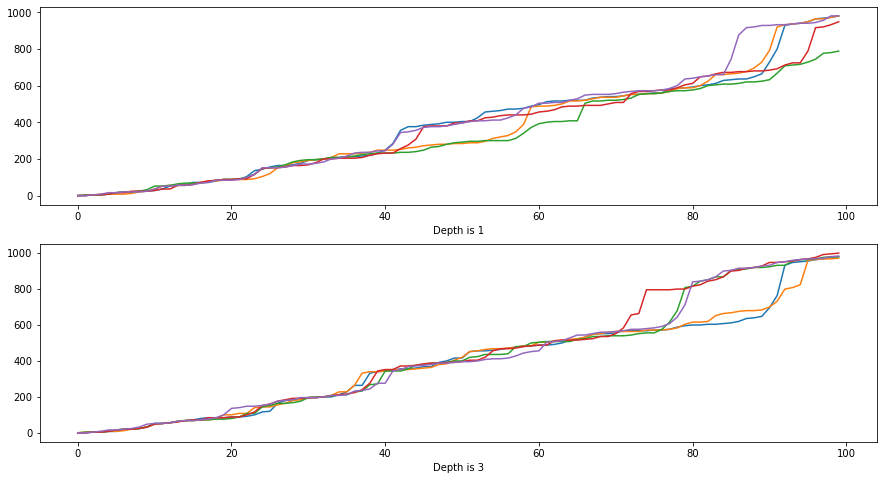

In [11]:
test_plot(iterations=100, run_ec=False)

Note: each test may take a while to run.


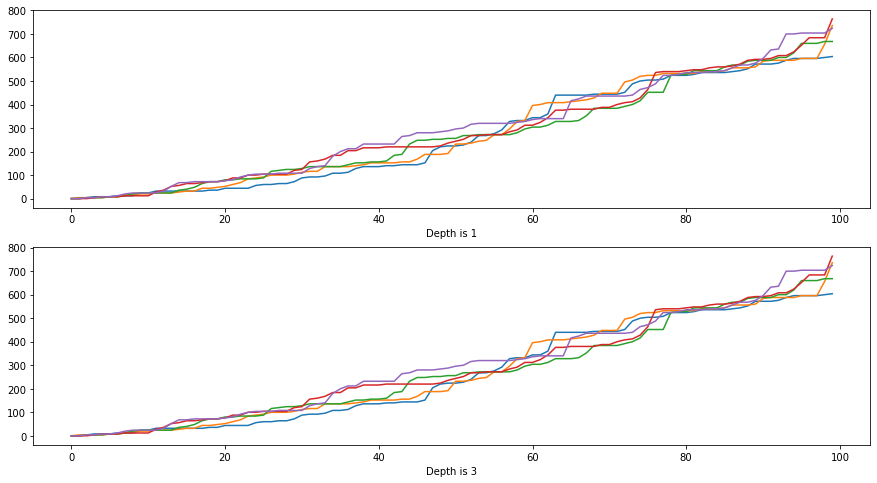

In [12]:
test_plot(iterations=100, run_ec=True)